In [12]:
import cv2
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

In [8]:
imglist=listdir('./train')
img=[]
for file in imglist:
    if "jpg" in file:
        img.append(file)
imglist=img

In [66]:
# read img
img=cv2.imread(join('train',imglist[2]),0) # color로 읽어오기

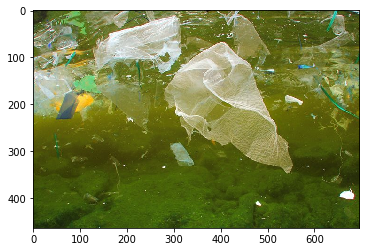

In [22]:
plt.imshow(img)

## 기본 임계처리

In [46]:
# cv2.threshold(src, thresh, maxval, type) → retval, dst
"""
src – input image로 single-channel 이미지.(grayscale 이미지)
thresh – 임계값
maxval – 임계값을 넘었을 때 적용할 value
type – thresholding type
"""

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

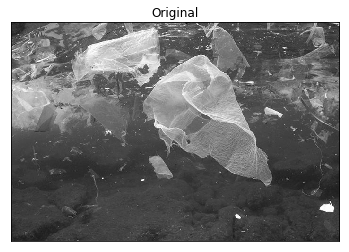

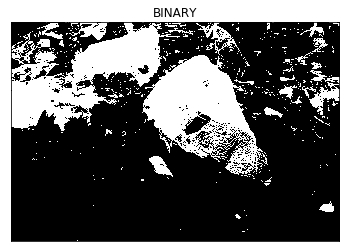

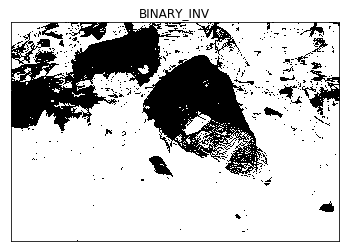

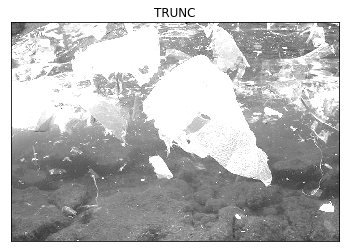

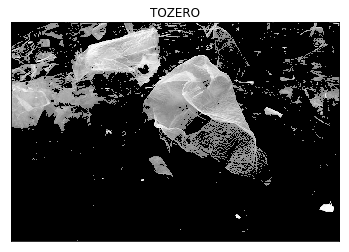

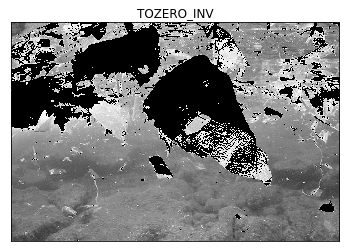

In [47]:
titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.figure(figsize=(20,20))
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## adaptive threshold

- img의 구간을 나누어서 적용한다

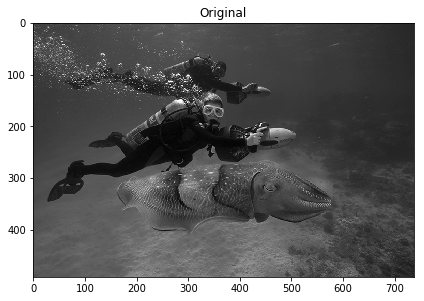

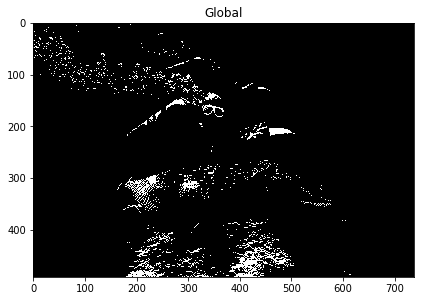

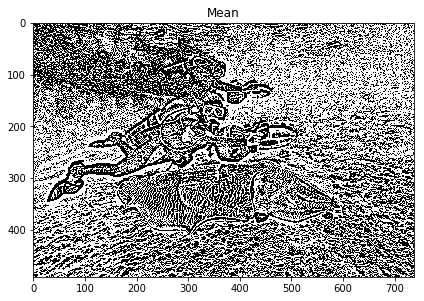

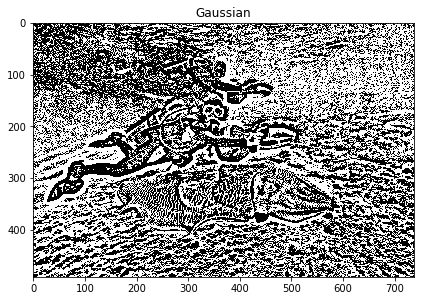

In [78]:
# read img
img=cv2.imread(join('train',imglist[4]),0) # color로 읽어오기


ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) # 기존의 thresholde

# cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
"""
src – grayscale image
maxValue – 임계값
adaptiveMethod – thresholding value를 결정하는 계산 방법
thresholdType – threshold type
blockSize – thresholding을 적용할 영역 사이즈
C – 평균이나 가중평균에서 차감할 값
"""

img.astype('uint8')
th2 =cv2.adaptiveThreshold(img,127,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,1)
th3 =cv2.adaptiveThreshold(img,127,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,1)

titles= ['Original','Global','Mean','Gaussian']

images=[img,th1,th2,th3]

for i in range(4):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    
plt.show()

In [48]:
len(imglist)

160

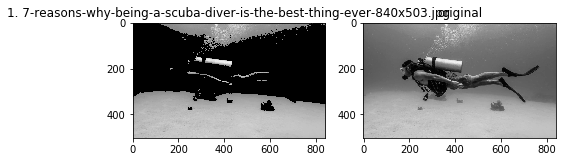

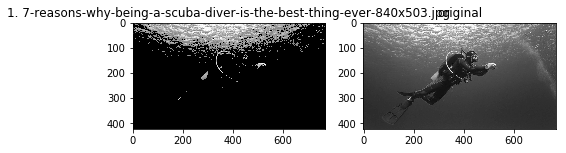

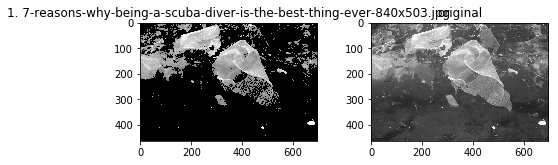

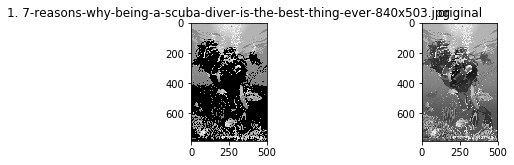

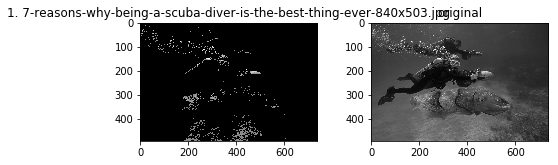

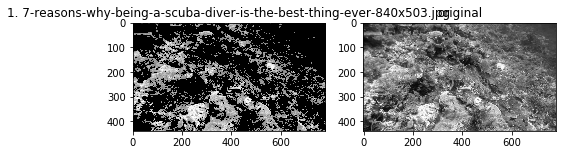

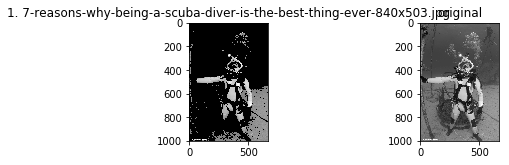

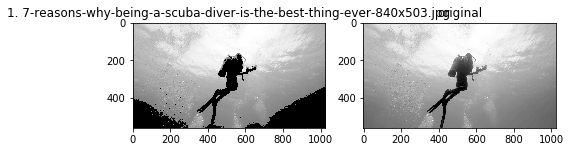

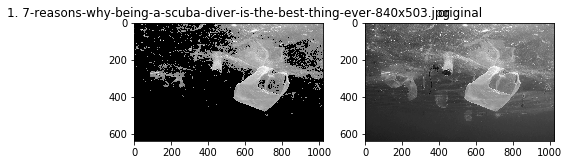

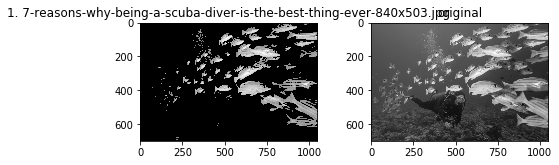

In [62]:
#TOZERO : grayscale
i=0
for img in imglist[:10]:
    
    img=cv2.imread(join('train',img),0)
    original=img
    ret, thresh = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
    plt.figure(figsize=(20,10))
    plt.subplot(4,5,i+1)
    plt.imshow(thresh,'gray')
    plt.title(imglist[i])
    plt.subplot(4,5,i+2)
    plt.imshow(original,'gray')
    plt.title("original")
plt.show()

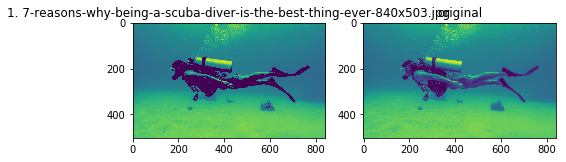

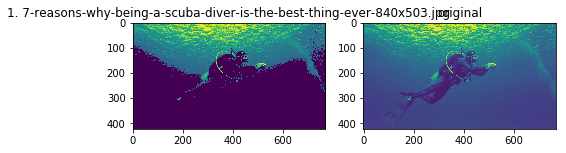

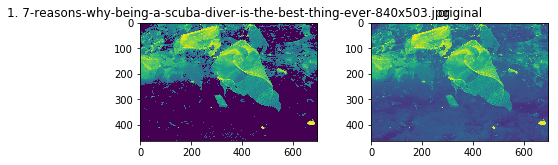

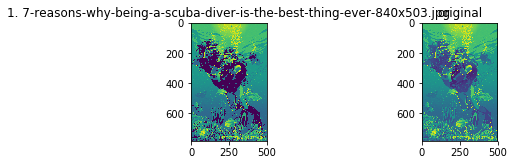

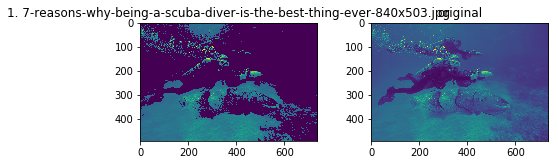

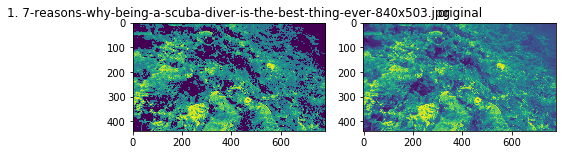

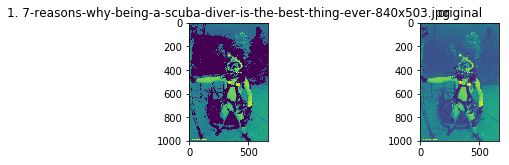

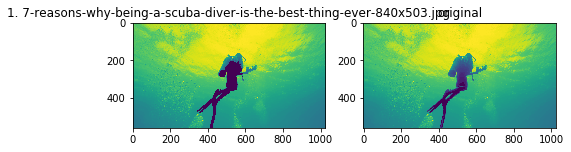

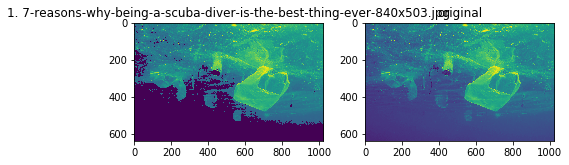

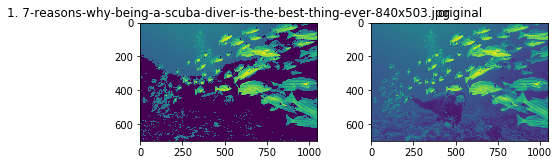

In [74]:
#TOZERO : color
i=0
for img in imglist[:10]:
    
    img=cv2.imread(join('train',img),0)
    original=img
    ret, thresh = cv2.threshold(img,80,255, cv2.THRESH_TOZERO)
    plt.figure(figsize=(20,10))
    plt.subplot(4,5,i+1)
    plt.imshow(thresh)
    plt.title(imglist[i])
    plt.subplot(4,5,i+2)
    plt.imshow(original)
    plt.title("original")
plt.show()